<a href="https://colab.research.google.com/github/GollapalliLavanya/E-commerce/blob/main/E_Commerce_Conversion_Rate_Optimization_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Feature Importance:
           Feature  Importance
0     Time_on_Site    0.397512
1     Pages_Viewed    0.380541
2      Device_Type    0.142130
3  Referral_Source    0.051534
4   Returning_User    0.028284


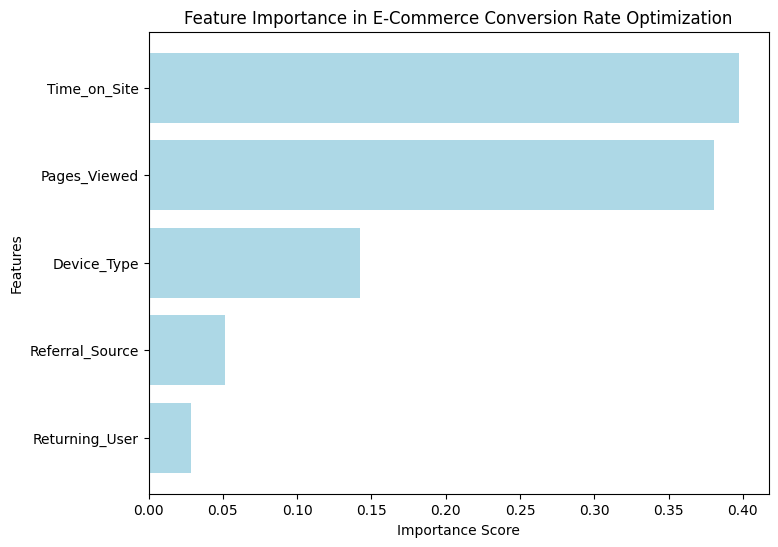

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Create a mock dataset
data = {
    "Time_on_Site": [2.5, 5.0, 1.5, 8.0, 3.5, 7.0, 2.0, 6.5, 1.0, 4.0],  # Minutes spent on site
    "Pages_Viewed": [3, 8, 2, 10, 4, 9, 3, 8, 1, 6],  # Number of pages viewed
    "Device_Type": [1, 2, 1, 2, 1, 2, 1, 2, 1, 1],  # 1 = Mobile, 2 = Desktop
    "Referral_Source": [1, 2, 3, 2, 1, 2, 3, 2, 1, 3],  # 1 = Organic, 2 = Ads, 3 = Social Media
    "Returning_User": [1, 1, 0, 1, 0, 1, 0, 1, 0, 0],  # 1 = Yes, 0 = No
    "Purchase": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Target: 1 = Purchase, 0 = No Purchase
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Preprocess the data
X = df.drop("Purchase", axis=1)  # Features
y = df["Purchase"]  # Target

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Feature Importance Analysis
importances = model.feature_importances_
feature_names = df.drop("Purchase", axis=1).columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
print("\nFeature Importance:")
print(importance_df)

# Plot Feature Importance (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="lightblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in E-Commerce Conversion Rate Optimization")
plt.gca().invert_yaxis()
plt.show()
